### Tang Quoc Hung - 19521583
Link Github: https://github.com/tangquochung/Data_Mining_Lab/tree/main/Lab4

# Lab 4 - Statistical Data Analytics

## I. Classification 

In [1]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

#Load the digits dataset: digits
digits = datasets.load_digits()

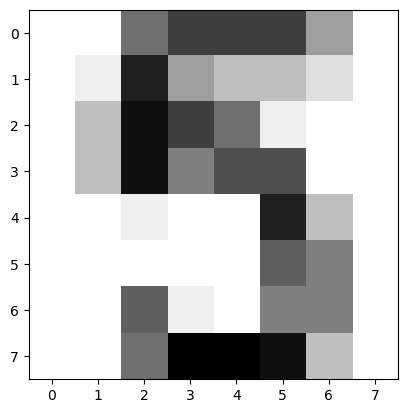

In [2]:
#Display image 1010
plt.imshow(digits.images[1010], cmap = plt.cm.gray_r, interpolation = 'nearest')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target

#Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify =y)

In [4]:
#Import necessary modules
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

#Create a R-NN classifier with 3 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=3)

#Fit the classifier to the training data
knn.fit(X_train, y_train)

#Print the accuracy
print("Accuracy: (0)".format(knn.score(X_test, y_test)))

Accuracy: (0)


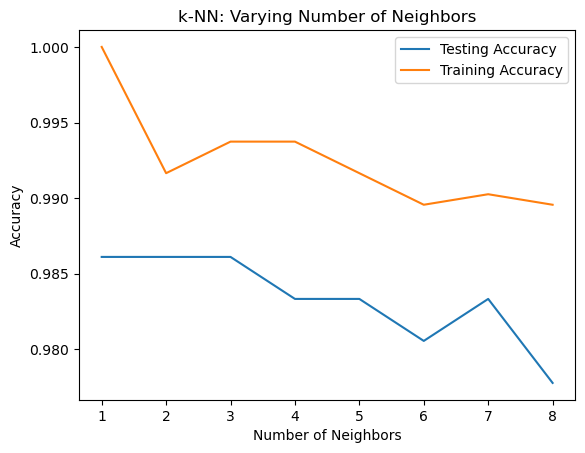

In [5]:
#Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

#Loop over different values of R
for i, k in enumerate(neighbors):
    #Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot (neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot (neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt .xlabel( 'Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [6]:
pip install -U future

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install torchvision

Note: you may need to restart the kernel to use updated packages.


In [8]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [9]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train=True, download=True)

In [10]:
print("Number of training examples", mnist.train_data.shape)
print("Image information", mnist[0])

Number of training examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x2D509E5ACA0>, 5)


C:\Users\Asus\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


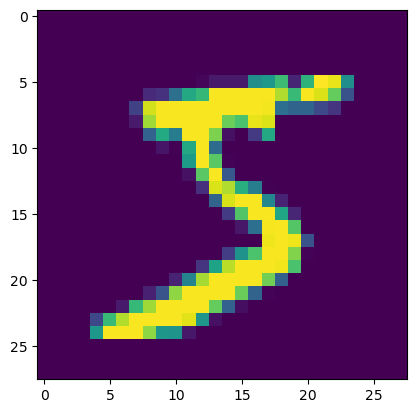

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0])

In [12]:
class Net (nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fully = nn.Sequential(
            nn.Linear(28*28, 10)
        )
        
    def forward(self, x):
        x = x.view([-1,28*28])
        x = self.fully(x)
        x = F.log_softmax(x, dim = 1)
        return x

In [13]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=True, transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.', train=False, transform=transforms.Compose([transforms.ToTensor()])), batch_size=1, shuffle=True)

In [14]:
def train():
    learning_rate = 1e-3
    num_epochs = 3
    
    net = Net()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            output = net(data)
            
            loss = F.nll_loss(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if batch_idx % 100 == 0:
                print('Epoch = %f. Batch = %s, Loss = %s' % (epoch, batch_idx, loss.item()))
    return net

In [15]:
net = train()

Epoch = 0.000000. Batch = 0, Loss = 2.2857818603515625
Epoch = 0.000000. Batch = 100, Loss = 0.7501681447029114
Epoch = 0.000000. Batch = 200, Loss = 0.6250507831573486
Epoch = 0.000000. Batch = 300, Loss = 0.5653549432754517
Epoch = 0.000000. Batch = 400, Loss = 0.359168142080307
Epoch = 0.000000. Batch = 500, Loss = 0.35880494117736816
Epoch = 0.000000. Batch = 600, Loss = 0.5537574291229248
Epoch = 0.000000. Batch = 700, Loss = 0.36743825674057007
Epoch = 0.000000. Batch = 800, Loss = 0.2521155774593353
Epoch = 0.000000. Batch = 900, Loss = 0.3209095895290375
Epoch = 1.000000. Batch = 0, Loss = 0.5124922394752502
Epoch = 1.000000. Batch = 100, Loss = 0.4218400716781616
Epoch = 1.000000. Batch = 200, Loss = 0.3750397861003876
Epoch = 1.000000. Batch = 300, Loss = 0.1902123987674713
Epoch = 1.000000. Batch = 400, Loss = 0.22354134917259216
Epoch = 1.000000. Batch = 500, Loss = 0.23686452209949493
Epoch = 1.000000. Batch = 600, Loss = 0.2780912518501282
Epoch = 1.000000. Batch = 700, L

In [16]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
    total += len(target)
    output = net(data)
    pred = output.max(1, keepdim=True)[1]
    correct += target.eq(pred.view_as(target)).sum()
    
print("Correct out of %s" % total, correct.item())
print("Perventage accuracy", correct.item()*100/10000.)

Correct out of 10000 9219
Perventage accuracy 92.19


## II. Linear Regression

In [17]:
#Import numpy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Read the CSV file into a DataFram: df
df = pd.read_csv('gapminder.csv')

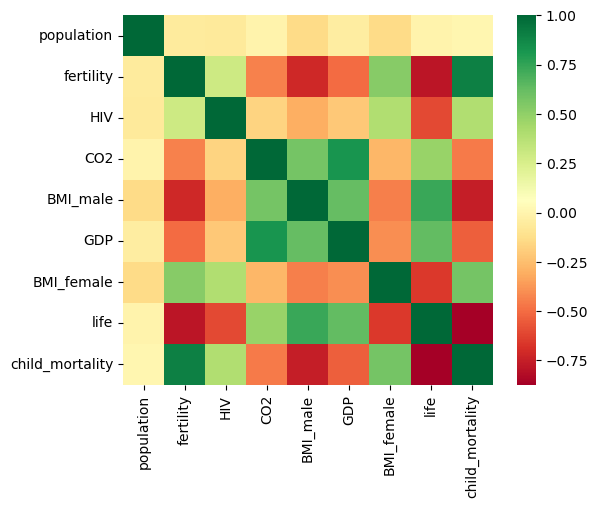

In [18]:
ax = sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()